In [9]:
from datasets import load_dataset
from transformers import pipeline, AutoTokenizer
import os
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np

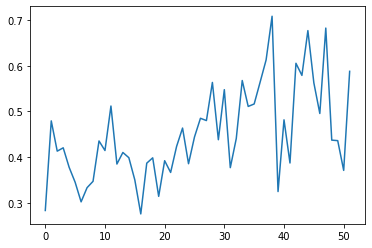

In [2]:
values = [0.2833, 0.4793, 0.4131, 0.4204, 0.3776, 0.3451, 0.3022, 0.3332, 0.3471,
         0.4354, 0.4145, 0.5118, 0.3849, 0.4102, 0.3988, 0.3502, 0.2758, 0.3868,
         0.3985, 0.3142, 0.3922, 0.3665, 0.4234, 0.4636, 0.3856, 0.4441, 0.4850,
         0.4800, 0.5634, 0.4381, 0.5476, 0.3770, 0.4406, 0.5676, 0.5109, 0.5163,
         0.5642, 0.6127, 0.7082, 0.3247, 0.4816, 0.3872, 0.6053, 0.5788, 0.6768,
         0.5625, 0.4955, 0.6823, 0.4372, 0.4361, 0.3710, 0.5877]

plt.plot(values)

In [3]:
dataset = load_dataset("imdb", split="train+test")
sentiment_fn = pipeline(
        "sentiment-analysis",
        "lvwerra/distilbert-imdb",
        top_k=2,
        truncation=True,
        batch_size=256,
        device=0 if int(os.environ.get("LOCAL_RANK", 0)) == 0 else -1,
    )

Found cached dataset imdb (/home/ubuntu/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


In [13]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
num_tokens = list(map(lambda x: len(tokenizer(x)[0]), dataset["text"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (1168 > 1024). Running this sequence through the model will result in indexing errors


(array([1.120e+02, 1.603e+03, 2.340e+03, 2.270e+03, 7.242e+03, 6.931e+03,
        5.097e+03, 3.816e+03, 3.065e+03, 2.243e+03, 2.064e+03, 1.673e+03,
        1.466e+03, 1.266e+03, 1.030e+03, 9.430e+02, 7.940e+02, 7.010e+02,
        5.720e+02, 5.540e+02, 4.720e+02, 4.340e+02, 3.690e+02, 3.120e+02,
        2.960e+02, 2.630e+02, 1.910e+02, 2.090e+02, 1.810e+02, 1.910e+02,
        1.440e+02, 1.350e+02, 1.150e+02, 1.060e+02, 1.050e+02, 8.900e+01,
        8.500e+01, 9.500e+01, 7.600e+01, 7.800e+01, 5.100e+01, 7.000e+01,
        5.300e+01, 3.500e+01, 1.000e+01, 1.600e+01, 4.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

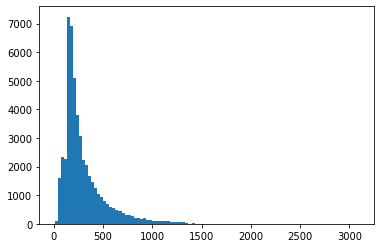

In [14]:
plt.hist(num_tokens, bins=100)

In [3]:
def get_positive_score(scores):
    "Extract value associated with a positive sentiment from pipeline's output"
    return dict(map(lambda x: tuple(x.values()), scores))["POSITIVE"]

def add_reward(samples):
    samples["reward"] = list(map(get_positive_score, sentiment_fn(samples["text"])))
    return samples

In [4]:
dataset = dataset.map(add_reward, batched=True, batch_size=1000)

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

/home/ubuntu/.local/lib/python3.8/site-packages/transformers/pipelines/base.py:1045: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [5]:
rewards = dataset["reward"]

(array([2.0000e+00, 9.0000e+00, 8.0000e+00, 2.6000e+01, 3.0000e+01,
        5.1000e+01, 5.1000e+01, 8.2000e+01, 1.0600e+02, 1.1700e+02,
        1.5000e+02, 1.6900e+02, 1.7100e+02, 1.6900e+02, 1.9800e+02,
        2.1200e+02, 2.4000e+02, 2.2900e+02, 2.4800e+02, 2.4500e+02,
        2.5100e+02, 2.5900e+02, 2.7400e+02, 2.6500e+02, 2.3600e+02,
        2.5900e+02, 2.7600e+02, 2.5100e+02, 2.5300e+02, 2.4700e+02,
        2.7500e+02, 2.4400e+02, 2.2700e+02, 2.5200e+02, 2.2700e+02,
        2.4100e+02, 2.1700e+02, 2.2200e+02, 2.4300e+02, 2.3900e+02,
        2.0200e+02, 2.1900e+02, 2.3300e+02, 2.2400e+02, 2.5400e+02,
        2.1700e+02, 2.0700e+02, 2.1000e+02, 1.7200e+02, 1.9000e+02,
        2.1700e+02, 1.8900e+02, 1.7400e+02, 1.7900e+02, 1.9700e+02,
        1.5400e+02, 1.7800e+02, 1.6400e+02, 1.8500e+02, 1.7900e+02,
        1.6300e+02, 1.5700e+02, 1.5000e+02, 1.5100e+02, 1.4100e+02,
        1.5200e+02, 1.4600e+02, 1.6600e+02, 1.4600e+02, 1.7800e+02,
        1.5500e+02, 1.6800e+02, 1.1500e+02, 1.44

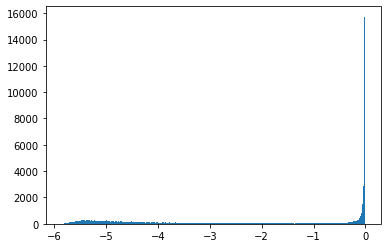

In [6]:
#plt.xlim(-0.5, 0)
plt.hist(np.log(np.array(rewards)), bins=300)


In [7]:
#all percentiles of reward
for i in range(0, 101, 20):
    print(i, np.percentile(rewards, i))

0 0.002819015644490719
20 0.007793527748435736
40 0.0484938271343709
60 0.9415658831596374
80 0.9895373225212097
100 0.99638831615448
